# Project 2: Getting Proficient!
------------------------------------------------
**Dr. Dave Wanik - OPIM 5502: Big Data Analytics with Cloud Computing - University of Connecticut**


* **Each Team Members Name and Student ID: **

    **Shailesh Yadav (*)**

    **Vasudha Mishra (*)**

The purpose of this project is to help you master the topics of:
* blending Python and SQL
* using pandas UDFs
* writing window functions

# Install Spark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Start a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Project2")\
        .getOrCreate()

In [ ]:
# some useful functions
import pyspark.sql.functions as F
import pyspark.sql.types as T

# Read the Data
We will use the GSOD dataset from Chapter 10.

In [ ]:
# mount your Drive and update your Path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the file
gsod = spark.read.parquet('/content/drive/MyDrive/Big data/Project2/Window')

In [ ]:
# rows and columns
# 12M rows and 32 columns
print(gsod.count(), len(gsod.columns))

12460217 32


In [ ]:
# schema
gsod.printSchema()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: string (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

In [ ]:
# look at the first few rows
gsod.show(10, truncate=False)

+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp  |count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust |max |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|917350|99999|2018|04 |21 |82.6|9         |9999.9|0         |1006.9|9        |993.2 |9        |999.9|0          |3.7 |9         |8.5  |999.9|85.5|*       |74.5|        |0.31|G        |999.9|0  |0           |0               

🙏 Good luck!

# 🔵 (30 pts, 5 pts each) Blending Python and SQL

### Select all rows where `temp` is greater than 90 and where windspeed is greater than 20.

Method 1

In [ ]:
# First we'll create a View
gsod.createOrReplaceTempView("gsodEntity")

In [ ]:
# Let's subset the data where temp > 90 and wdsp > 20
high_temp_windspeed = spark.sql("select * from gsodEntity where temp>90 and wdsp>20")

Method 2

In [ ]:
# We can subset using this method as well
high_temp_wdsp = gsod.where((F.col("temp") > 90) & (F.col("wdsp") > 20))

### Print the count of rows and show first 10 rows to confirm your answer.

In [ ]:
# Checking the answer for Method 1
print("Number of rows with high temperature and high windpeed: {}".format(high_temp_windspeed.count()))


Number of rows with high temperature and high windpeed: 3741


In [ ]:
# Checking the asnwer for Method 2
print("Number of rows with high temperature and high windpeed: {}".format(high_temp_wdsp.count()))

Number of rows with high temperature and high windpeed: 3741


In [ ]:
print("first 10 rows of station with high temperature and high windspeed are")
high_temp_windspeed.show(10, truncate=False)

first 10 rows of station with high temperature and high windspeed are
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp  |count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp |count_wdsp|mxpsd|gust |max  |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|764990|99999|2018|08 |26 |90.3|9         |73.9  |9         |1014.2|9        |1011.8|9        |5.2  |9          |999.9|0         |999.9|999.9|104.7

### How many unique stations met the condition of temp>90 and wdsp>20?

We can see that the temp values are all above 100, and windspeed values are all above 20, but the values appear to be 999.9 that means these are missing values and have been imputed by this constant value.

In [ ]:
# We'll use count() and distinct() to find the unqiue values
spark.sql("select count(distinct(stn)) as distinct_stations from gsodEntity where temp>90 and wdsp >20 ").show()

+-----------------+
|distinct_stations|
+-----------------+
|              283|
+-----------------+



### Find the top 10 stations (`stn`) where the condition is true.

In [ ]:
# To find the top 10 stations, we count the repeated occurences of the condition of high temp and high windspeed per station 
# We'll then sort the count in descending order and display the top 10
spark.sql("select stn,count(stn) as total_stations from gsodEntity where temp>90 and wdsp>20 group by stn order by total_stations desc limit 10").show()

+------+--------------+
|   stn|total_stations|
+------+--------------+
|999999|           804|
|406370|           294|
|406570|           186|
|406320|           118|
|408290|           108|
|406560|            99|
|406460|            85|
|406080|            84|
|406640|            72|
|406720|            70|
+------+--------------+



### Where is the top station (that is not 999999)? 
Below is the list of all GSOD stations - Google the location and let me know where it is by writing your answer and embedding a picture!

Here is a list of all the GSOD stations:
* http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GSOD/.MONTHLY/.Name/IWMO+exch+table-+text+text+skipanyNaN+-table+.html

**Answer:** 406370 is STATION KHANAQIN - it is hot and windy there!

(embed a picture here from Google Images or Wikipedia)

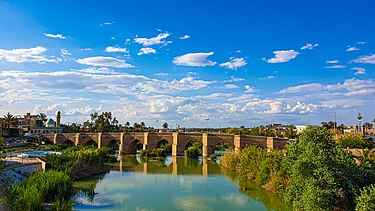

### What month/year was the hottest and windiest at that particular station?

In [ ]:
# Let's first subset the data for the top station and have a look at the data
top_stn = high_temp_wdsp.where(F.col('stn') == 406370)
top_stn.show(10)

+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|   stn| wban|year| mo| da| temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|406370|99999|2018| 08| 11| 97.6|         4|52.7|         4|1001.1|        4|9999.9|        0|  6.2|          4|999.9|         0|999.9|999.9|114.8|        |78.8|        | 0.0|        F|999.9|  0|           0|            

In [ ]:
# We can create multi-level grouping and find average for the groups to find the month and year when it was hottest
top_stn.groupby(['year','mo']).agg(F.mean('temp')).sort(['avg(temp)'], ascending = False).show(1)

+----+---+------------------+
|year| mo|         avg(temp)|
+----+---+------------------+
|2019| 08|103.63333333333338|
+----+---+------------------+
only showing top 1 row



It was the hottest in August of 2019

In [ ]:
# We can create multi-level grouping and find average for the groups to find the month and year when it was windiest
top_stn.groupby(['year','mo']).agg(F.mean('wdsp')).sort(['avg(wdsp)'], ascending = False).show(1)

+----+---+-----------------+
|year| mo|        avg(wdsp)|
+----+---+-----------------+
|2018| 06|999.9000000000004|
+----+---+-----------------+
only showing top 1 row



It was the windiest in August of 2018

The average of windspeed shows that the values for wdsp are mostly missing.

In [ ]:
# Let's check the no. of rows in our top station
top_stn.count()

294

In [ ]:
# Let's check the no. of rows having missing values of windspeed
top_stn.filter(top_stn.wdsp == 999.9).count()

294

We can see that all entries of windspeed for our top station are missing and have been imputed by the default value.

# 🔵 (30 pts total, 10 pts each) Pandas UDFs

In [ ]:
import pyspark.sql.functions as F
import pyspark.sql.types as T

## Return summary statistics of the `temp` and `wdsp` columns and note the range of values.

Please show the count, min 25th, 50th, 75th percentile and max value.

In [ ]:
# # warning: this may take a few mins to run!
# i've pasted output below

#+-------+--------+--------+
#|summary|    temp|    wdsp|
#+-------+--------+--------+
#|  count|12460217|12460217|
#|    min|  -114.7|     0.0|
#|    25%|    41.2|     3.5|
#|    75%|    73.7|     8.7|
#|    max|   110.0|   999.9|
#+-------+--------+--------+

In [ ]:
# Method 1
# We can use summary to get the desired output
gsod.select('temp','wdsp').summary("count","min","25%","75%","max").show()

+-------+--------+--------+
|summary|    temp|    wdsp|
+-------+--------+--------+
|  count|12460217|12460217|
|    min|  -114.7|     0.0|
|    25%|    41.2|     3.5|
|    75%|    73.7|     8.7|
|    max|   110.0|   999.9|
+-------+--------+--------+



In [ ]:
# Method 2
# We can go with multiple select statements that give what we need, and using union on all of them
spark.sql("SELECT 'count' AS summary, COUNT(temp) AS temp_count, COUNT(wdsp) AS wdsp_count FROM gsodEntity \
          UNION SELECT 'min' AS summary, MIN(temp) AS temp_min, MIN(wdsp) AS wdsp_min FROM gsodEntity \
          UNION SELECT '25%' AS summary, percentile_approx(temp, 0.25) AS temp_25th, \
                    percentile_approx(wdsp, 0.25) AS wdsp_25th FROM gsodEntity \
          UNION SELECT '50%' AS summary, percentile_approx(temp, 0.50) AS temp_50th, \
                    percentile_approx(wdsp, 0.50) AS wdsp_50th FROM gsodEntity\
          UNION SELECT '75%' AS summary, percentile_approx(temp, 0.75) AS temp_75th, \
                    percentile_approx(wdsp, 0.75) AS wdsp_75th FROM gsodEntity\
          UNION SELECT 'max' AS summary, MAX(temp) AS temp_max, MAX(wdsp) AS wdsp_max FROM gsodEntity").show()

+-------+-----------+----------+
|summary| temp_count|wdsp_count|
+-------+-----------+----------+
|  count|1.2460217E7|  12460217|
|    min|     -114.7|       0.0|
|    25%|       41.2|       3.5|
|    50%|       58.5|       5.6|
|    75%|       73.7|       8.7|
|    max|      110.0|     999.9|
+-------+-----------+----------+



It looks like there are some missing values for the wdsp column.

Review this metadata for the units of each column:
* https://www.ncei.noaa.gov/data/global-summary-of-the-day/doc/readme.txt

```
TEMP - Mean temperature (.1 Fahrenheit)
DEWP - Mean dew point (.1 Fahrenheit)
SLP - Mean sea level pressure (.1 mb)
STP - Mean station pressure (.1 mb)
VISIB - Mean visibility (.1 miles)
WDSP – Mean wind speed (.1 knots)
MXSPD - Maximum sustained wind speed (.1 knots)
GUST - Maximum wind gust (.1 knots)
MAX - Maximum temperature (.1 Fahrenheit)
MIN - Minimum temperature (.1 Fahrenheit)
PRCP - Precipitation amount (.01 inches)
SNDP - Snow depth (.1 inches)
```



## Write a Pandas UDF that converts temperature from F to C
Use a decorator! You can hack the example in the book.

In [ ]:
# Hacking the exapmple from book with minimal changes
from fractions import Fraction
from typing import Tuple, Optional

# The decorator performs the same function as the udf() function, 
# but returns a UDF bearing the name of the function 
# defined under it.
@F.udf(T.DoubleType()) # this is the output type of the UDF!
def farenheit_to_celsius(farenh: float) -> Optional[float]:
 if farenh:
  return (farenh - 32)*(5/9)
 return None


Now add it as a column in `gsod`.

In [ ]:
# Let's add the new column to our original dataset
gsod = gsod.withColumn("celsius_temp",F.round(farenheit_to_celsius(gsod.temp),2))

In [ ]:
# Let's see if our UDF worked as expected
gsod.select('stn','temp','wdsp','celsius_temp').show(10)

+------+----+----+------------+
|   stn|temp|wdsp|celsius_temp|
+------+----+----+------------+
|917350|82.6| 3.7|       28.11|
|076470|65.0| 4.6|       18.33|
|996470|55.6| 5.1|       13.11|
|996170|54.2| 9.3|       12.33|
|818380|84.2|15.1|        29.0|
|998012|44.6|14.0|         7.0|
|719140|36.5| 1.4|         2.5|
|995500|42.2|22.7|        5.67|
|994971|51.2| 0.0|       10.67|
|952880|79.9|17.6|       26.61|
+------+----+----+------------+
only showing top 10 rows



## Write a Pandas UDF that converts `WDSP` from knots to m/s

Be careful - I think there are missing values coded as 999 - make these rows the number 0 instead of 999 and convert to a numeric data type.

In [ ]:
# Let's check the datatype for wdsp
gsod.schema["wdsp"].dataType

StringType()

In [ ]:
# First let's convert the wdsp to numeric datatype
gsod = gsod.withColumn("wdsp",gsod.wdsp.cast('double'))

In [ ]:
# Let's check if it worked
gsod.schema["wdsp"].dataType

DoubleType()

In [ ]:
# Let's check the total rows in our dataset again
gsod.count()

12460217

In [ ]:
# Now let's see for how many rows do we have missing values in windspeed
gsod.filter(F.col('wdsp')==999.9).count()

503887

In [ ]:
print("We have {:0.2f}% of missing values in windspeed".format(503887*100/12460217))

We have 4.04% of missing values in windspeed


In [ ]:
# Let's replace the default value of missing, i.e. 999.9 by zero
gsod = gsod.withColumn("wdsp", F.when(gsod.wdsp == 999.9,0) \
      .otherwise(gsod.wdsp))

In [ ]:
# Now let's see if we have any more 999.9 in wdsp in our data
gsod.filter(F.col('wdsp')==999.9).count()

0

Write a pandas UDF to convert `wdsp` from knots to meters per second.

In [ ]:
# Create UDF for conversion
@F.udf(returnType=T.DoubleType())
def knots_to_mps(wdsp_knots):
    return wdsp_knots*0.5144 # 1 knot = 0.514444 meters per second

Now apply the pandas UDF to the `wdsp` column.

In [ ]:
# Let's see if our UDF worked as expected
gsod = gsod.withColumn("wdsp_mpsec",F.round(knots_to_mps(gsod.wdsp),2))
gsod.select("stn","wdsp","wdsp_mpsec").show(10)

+------+----+----------+
|   stn|wdsp|wdsp_mpsec|
+------+----+----------+
|917350| 3.7|       1.9|
|076470| 4.6|      2.37|
|996470| 5.1|      2.62|
|996170| 9.3|      4.78|
|818380|15.1|      7.77|
|998012|14.0|       7.2|
|719140| 1.4|      0.72|
|995500|22.7|     11.68|
|994971| 0.0|       0.0|
|952880|17.6|      9.05|
+------+----+----------+
only showing top 10 rows



# 🔵 (20 pts total, 10 pts each) Window Functions

## Station Quality

In [ ]:
# these are the total number of stations - 12k
print('These are the counts of all stations:', gsod.select('stn').distinct().count())
# look at stations with sparse data quality - 9.9k
tmp = gsod.groupby('stn').count().orderBy(F.col('count').desc())
# let's keep stations that have 300*3 = 900 observations
tmp = tmp.where(f'count > 900').select('stn', 'count')
print('These are the counts of stations with decent data quality:', tmp.distinct().count())
tmp.show(10)

These are the counts of all stations: 12832
These are the counts of stations with decent data quality: 9963
+------+------+
|   stn| count|
+------+------+
|999999|312826|
|720613|  1257|
|720609|  1252|
|720408|  1243|
|747918|  1243|
|720586|  1242|
|720738|  1240|
|720643|  1238|
|720254|  1238|
|720961|  1236|
+------+------+
only showing top 10 rows



In [ ]:
# make a plot of those stations with good data quality
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tmp = tmp.toPandas()
tmp.describe()

,count
count,9963.000000
mean,1105.040149
std,3123.529808
min,901.000000
25%,1076.000000
50%,1085.000000
75%,1086.000000
max,312826.000000


In [ ]:
#tmp first 20 records plot having good data quality f station, we have not considered the station 999999
tmp_first_20 = tmp.iloc[1:20]

In [ ]:
# Make a bar plot of the stations with good data quality
tmp_first_20

,stn,count
1,720613,1257
2,720609,1252
3,720408,1243
4,747918,1243
5,720586,1242
6,720738,1240
7,720643,1238
8,720254,1238
9,720961,1236
10,720448,1235


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '720613'),
  Text(1, 0, '720609'),
  Text(2, 0, '720408'),
  Text(3, 0, '747918'),
  Text(4, 0, '720586'),
  Text(5, 0, '720738'),
  Text(6, 0, '720643'),
  Text(7, 0, '720254'),
  Text(8, 0, '720961'),
  Text(9, 0, '720448'),
  Text(10, 0, '720902'),
  Text(11, 0, '720539'),
  Text(12, 0, '720584'),
  Text(13, 0, '747917'),
  Text(14, 0, '720406'),
  Text(15, 0, '726873'),
  Text(16, 0, '720411'),
  Text(17, 0, '725258'),
  Text(18, 0, '722248')])

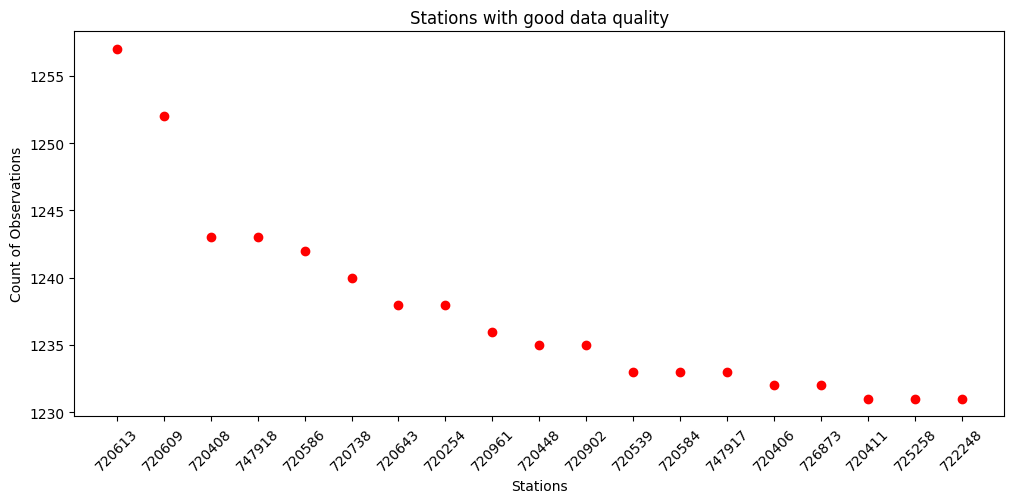

In [ ]:
# First let's set the figure size
plt.rcParams["figure.figsize"] = (12,5)

# Let's create our plot
plt.scatter(tmp_first_20["stn"], tmp_first_20["count"],color='r')
plt.title('Stations with good data quality')
plt.xlabel('Stations')
plt.ylabel('Count of Observations')
plt.xticks(rotation=45)

## Rolling Averages

Read this:
* https://stackoverflow.com/questions/45806194/pyspark-rolling-average-using-timeseries-data

...decide which answer is closest to our GSOD dataset, and decide if you need to use rowBetween and rangeBetween! Remember your data is in daily data right now and that you may not have a perfect of observations each day.

First, hack listing 10.20 in the book and create a unix timestep column.

In [ ]:
# Create a Unix Timestamp using listing 10.20
gsod = (
    gsod.withColumn(
        "dt",
        F.to_date(
            F.concat_ws("-", F.col("year"), F.col("mo"), F.col("da"))
        ),
    )
    .withColumn("dt_num", F.unix_timestamp("dt"))
)

In [ ]:
# Check the results of the step above
gsod.select("stn","dt","dt_num").show(10)

+------+----------+----------+
|   stn|        dt|    dt_num|
+------+----------+----------+
|917350|2018-04-21|1524268800|
|076470|2018-06-07|1528329600|
|996470|2018-03-12|1520812800|
|996170|2018-01-08|1515369600|
|818380|2018-05-05|1525478400|
|998012|2018-01-27|1517011200|
|719140|2018-02-11|1518307200|
|995500|2018-01-28|1517097600|
|994971|2018-01-28|1517097600|
|952880|2018-11-16|1542326400|
+------+----------+----------+
only showing top 10 rows



Now select one station for demonstation purposes - let's just use `stn == 406370` for demo purposes.

In [ ]:
# Subset the data of one station for demo purpose
gsod_subset = gsod.where(F.col("stn")==406370)

In [ ]:
# Let's see how many rows we have
gsod_subset.count()

887

In [ ]:
# Let's check the subset
gsod_subset.show(10)

+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+------------+----------+----------+----------+
|   stn| wban|year| mo| da| temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|celsius_temp|wdsp_mpsec|        dt|    dt_num|
+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+------------+----------+----------+----------+
|406370|99999|2018| 12| 24| 52.4|         4|44.4|         4|1022.9|        4|9999.9| 

Convert this data sample toPandas() and make a nice line plot of `temp` vs. date. Remember to convert the date to a datetime and then set the index as the date column in order to get a nice looking graph.

In [ ]:
# Convert to Pandas using toPandas()
gsod_subset_pd = gsod_subset.toPandas()

In [ ]:
# Preprocess the data to create the plot in an easy manner
gsod_subset_pd['dt'] = pd.to_datetime(gsod_subset_pd['dt'])   # Convert the column to datetime format
gsod_subset_pd = gsod_subset_pd.sort_values(by='dt')  # Sort the data according to date
gsod_subset_pd.set_index('dt', inplace=True)   # Set the index as date

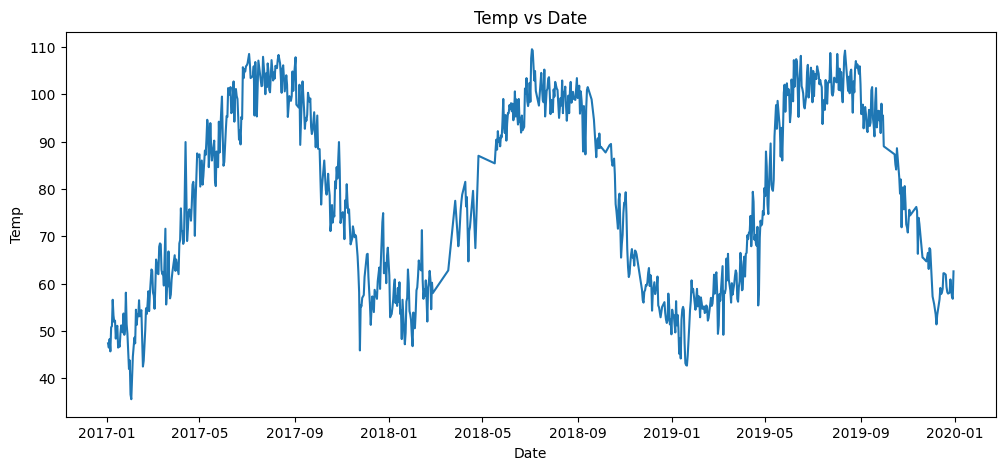

In [ ]:
# First let's set the figure size
fig, ax = plt.subplots(figsize=(12, 5))
# Let's plot
plt.plot(gsod_subset_pd["temp"])
ax.set_xlabel('Date', color="black")
ax.set_ylabel('Temp', color="black")
plt.title('Temp vs Date')
plt.show()

Check to make sure there are no missing values in the `temp` column.

In [ ]:
# Check if there are any missing values in temp
gsod_subset.select([F.count(F.when(F.isnan(c), c)).alias(c) for c in ["temp"]]).show()

+----+
|temp|
+----+
|   0|
+----+



Check out the data quality of April 2018 and show 30 rows for this station. Make a comment about the data quality.

In [ ]:
# Create a subset for the month of April 2018
gsod_subset_pd_apr = gsod_subset_pd.loc['2018-04-01':'2018-04-30']

In [ ]:
pd.set_option('display.max_columns',500)
# Check the subset
gsod_subset_pd_apr.head(30)

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,mxpsd,gust,max,flag_max,min,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,celsius_temp,wdsp_mpsec,dt_num
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01,406370,99999,2018,04,01,69.5,6,52.7,6,1012.6,6,9999.9,0,6.2,6,0.0,0,999.9,999.9,83.3,,54.7,*,0.00,E,999.9,0,0,0,0,0,0,20.83,0.00,1522540800
2018-04-02,406370,99999,2018,04,02,72.4,6,53.6,6,1012.8,6,9999.9,0,6.2,6,0.0,0,999.9,999.9,82.0,*,56.8,,0.00,E,999.9,0,0,0,0,0,0,22.44,0.00,1522627200
2018-04-03,406370,99999,2018,04,03,75.5,7,54.7,7,1012.9,6,9999.9,0,6.2,7,0.0,0,999.9,999.9,90.5,,57.2,,0.00,F,999.9,0,0,0,0,0,0,24.17,0.00,1522713600
2018-04-04,406370,99999,2018,04,04,77.4,7,56.2,7,1011.0,7,9999.9,0,6.2,7,5.1,5,7.8,999.9,92.3,,60.8,,0.00,F,999.9,0,0,0,0,0,0,25.22,2.62,1522800000
2018-04-05,406370,99999,2018,04,05,78.8,4,55.4,4,1009.5,4,9999.9,0,6.2,4,0.0,0,999.9,999.9,88.5,*,62.1,,0.00,E,999.9,0,0,0,0,0,0,26.00,0.00,1522886400
2018-04-09,406370,99999,2018,04,09,81.5,4,58.0,4,1010.7,4,9999.9,0,6.2,4,0.0,0,999.9,999.9,92.7,*,72.5,*,0.00,E,999.9,0,0,0,0,0,0,27.50,0.00,1523232000
2018-04-10,406370,99999,2018,04,10,76.3,5,57.1,5,1010.0,5,9999.9,0,6.2,5,0.0,0,999.9,999.9,83.8,*,68.5,*,0.00,E,999.9,0,0,0,0,0,0,24.61,0.00,1523318400
2018-04-11,406370,99999,2018,04,11,78.3,6,57.2,6,1008.1,6,9999.9,0,7.1,6,4.4,4,5.8,999.9,91.4,,66.2,,0.00,F,999.9,0,0,0,0,1,0,25.72,2.26,1523404800
2018-04-13,406370,99999,2018,04,13,64.7,7,55.3,7,1011.2,7,9999.9,0,6.2,7,0.0,0,999.9,999.9,77.5,,56.3,,0.24,F,999.9,0,0,0,0,0,0,18.17,0.00,1523577600


**We can see that we got only 14 rows for the month of April 2018. Thus there are many days wherein the data has not been recorded, and the date entries are just not present in the data. Even with the date records that we have, 10 out 14 wdsp values are missing and are thus zero.**

Create the window function for a 3 day rolling temperature (remember - time matters!) The window should be composed of today, yesterday, and two days ago. 

**Note:** The example from the book is not directly applicable here - make sure you check your work and work out some of the math to confirm your rolling window function did what it was supposed to do!

**Since our window should be composed of today, yesterday, and two days ago, we need to use rangeBetween and not rowBetween. Using rangeBetween, we ensure that it takes the previous 3 days into account, while rowBetween will take previous 3 rows into account, and thus if there are missing records for yesterday or two days ago, it will take earlier records and calculate the moving average.**

In [ ]:
# Let's create a GMT timestamp to create our window
from pyspark.sql.window import Window
gsod_subset = gsod_subset.withColumn('timestampGMT', gsod_subset.dt.cast('timestamp'))

# Calculate no. of seconds given the days
days = lambda i: i * 86400

#create window by casting timestamp to long (number of seconds)
w = Window.orderBy(F.col("timestampGMT").cast('long')).rangeBetween(-days(2), 0)

In [ ]:
# Use the window funnction to calculate 3 day rolling averages
gsod_subset1 = gsod_subset.withColumn('3_day_rolling_average', F.round(F.avg("temp").over(w),2))

In [ ]:
# Let's check our results
gsod_subset1.select("dt","temp","3_day_rolling_average").show(10)

+----------+----+---------------------+
|        dt|temp|3_day_rolling_average|
+----------+----+---------------------+
|2017-01-03|47.4|                 47.4|
|2017-01-04|46.5|                46.95|
|2017-01-05|48.3|                 47.4|
|2017-01-06|45.7|                46.83|
|2017-01-07|50.8|                48.27|
|2017-01-08|51.0|                49.17|
|2017-01-09|56.6|                 52.8|
|2017-01-10|53.3|                53.63|
|2017-01-11|51.9|                53.93|
|2017-01-12|52.2|                52.47|
+----------+----+---------------------+
only showing top 10 rows



First entry: No records before thus 3_day_rolling_average = temp = 47.4

Second entry: 3_day_rolling_average = (46.5 + 47.4)/2 = 93.9/2 = 46.95

Third entry: 3_day_rolling_average = (48.3 + 46.5 + 47.4)/3 = 142.2/3 = 47.4

Fourth entry: 3_day_rolling_average = (45.7 + 48.3 + 46.5)/3 = 140.5/3 = 46.833

Fifth entry: 3_day_rolling_average = (50.8 + 45.7 + 48.3)/3 = 144.8/3 = 48.266

Make a line plot with the raw temperature value (in blue) and the rolling window temperature value (in orange).

In [ ]:
# Convert to Pandas using toPandas()
gsod_subset1_pd = gsod_subset1.toPandas()

In [ ]:
# Preprocess the data to create the plot in an easy manner
gsod_subset1_pd = gsod_subset1_pd.sort_values(by='dt')  # Sort the data according to date
gsod_subset1_pd.set_index('dt', inplace=True) # Set the index as date

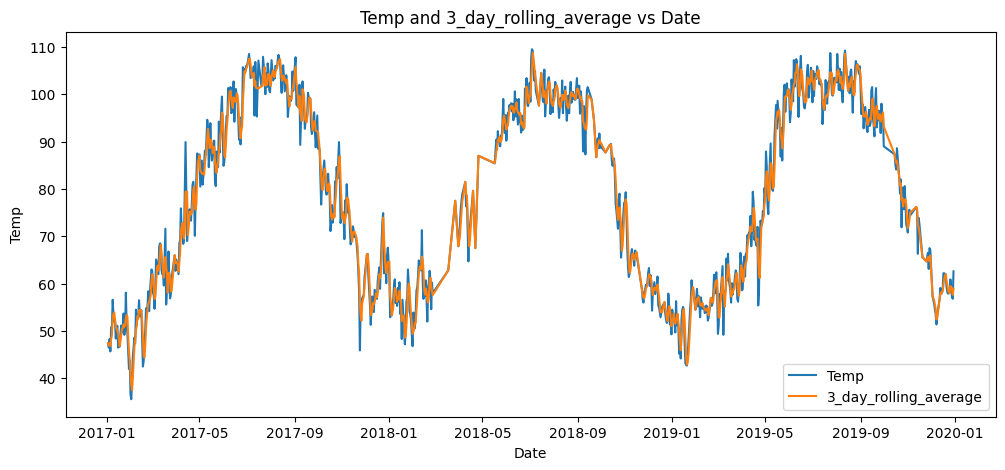

In [ ]:
# First let's set the figure size
fig, ax = plt.subplots(figsize=(12, 5))
# Let's plot
plt.plot(gsod_subset1_pd[["temp","3_day_rolling_average"]])
ax.set_xlabel('Date', color="black")
ax.set_ylabel('Temp', color="black")
plt.title('Temp and 3_day_rolling_average vs Date')
plt.legend(['Temp', '3_day_rolling_average'])
plt.show()

# 🔵 (20 pts total) Pandas UDFs and/or Window Functions

This is probably the hardest part of the project - spend some time on this and try a few different approaches if needed! I recommend just using a single station with all observations - how about station 406370? 

## Consecutive Values Above Threshold
I would like a new column in the PySpark DataFrame that contains the maximum consecutive values above a threshold (>=90 degF).

If the raw values are [91, 89, 88, 93, 94, 101, 85], then the output should be [1, 0, 0, 1, 2, 3, 0]. You are summing cumulative logical values!

Read this:
* https://stackoverflow.com/questions/73121080/count-consecutive-numbers-from-a-column-of-a-dataframe-in-python
* https://datascience.stackexchange.com/questions/77644/count-the-max-number-of-consecutive-1-and-0-in-pandas-dataframe
* ... and Chapters 8, 9 and 10 in your book

Now go code it up!

#### Method 1 - Using Pandas

In [ ]:
# Command to see max 500 rows
pd.set_option('display.max_rows',500)

In [ ]:
# Let's create a new column according to our condition
# If temp > 90, new column will be 1, or else it will be 0
gsod_subset1_pd['temp_bin'] = gsod_subset1_pd['temp'].apply(lambda x: 1 if x > 90 else 0)

In [ ]:
# Over here we first create a dataframe with our logical values
a = gsod_subset1_pd['temp_bin'] != 0
# Next, we calculate cumsum of boolean series. 
# Then we set all elements of the cumulative sum that correspond to False values in 'a' to NaN
# Then we forwards fill the NaN values with the last non-null value in the series and this 
# effectively "carries over" the most recent cumulative sum whenever the condition in a becomes false.

# Finally we subtracts the "carried-over" cumulative sum from the overall cumulative sum at each point, 
# effectively starting a new count every time the condition in a becomes false. 
# This gives us a series of integers where each element represents the number of times the condition 
# in 'a' has been true since the last time it became false.
gsod_subset1_pd['counter'] = a.cumsum()-a.cumsum().where(~a).ffill().fillna(0).astype(int)
gsod_subset1_pd[['temp','temp_bin','counter']].head(200)


,temp,temp_bin,counter
dt,,,
2017-01-03,47.4,0,0
2017-01-04,46.5,0,0
2017-01-05,48.3,0,0
2017-01-06,45.7,0,0
2017-01-07,50.8,0,0
2017-01-08,51.0,0,0
2017-01-09,56.6,0,0
2017-01-10,53.3,0,0
2017-01-11,51.9,0,0


#### Method 2 - Using Window

In [ ]:
from pyspark.sql.window import Window

In [ ]:
# Let's create a new column according to our condition
# If temp > 90, new column will be 1, or else it will be 0
gsod_subset1 = gsod_subset1.withColumn("temp_above_90", F.when(F.col("temp") > 90, 1).otherwise(0))

# We then create a column named group using window fn
# This column increments every time our condition is 0, i.e. temp < 90
# So for the cases where temp > 90, we should have same value of group
# This can be seen in the output shown
# Next we use window fn again, but now, we partition by group
# We create a new column temp_cumsum, to increment according to group partitions
# So if we have cases where we have same value of group, we increment temp_cumsum 

gsod_subset1 = gsod_subset1.withColumn(
    "grp", 
    F.sum((F.col("temp_above_90") == 0).cast("int")).over(Window.orderBy("dt"))
).withColumn(
    "temp_cumsum",
    F.sum(F.col("temp_above_90")).over(Window.partitionBy("grp").orderBy("dt"))
)

In [ ]:
gsod_subset1.select('dt','temp','temp_above_90','temp_cumsum','grp').show(200)

+----------+-----+-------------+-----------+---+
|        dt| temp|temp_above_90|temp_cumsum|grp|
+----------+-----+-------------+-----------+---+
|2017-01-03| 47.4|            0|          0|  1|
|2017-01-04| 46.5|            0|          0|  2|
|2017-01-05| 48.3|            0|          0|  3|
|2017-01-06| 45.7|            0|          0|  4|
|2017-01-07| 50.8|            0|          0|  5|
|2017-01-08| 51.0|            0|          0|  6|
|2017-01-09| 56.6|            0|          0|  7|
|2017-01-10| 53.3|            0|          0|  8|
|2017-01-11| 51.9|            0|          0|  9|
|2017-01-12| 52.2|            0|          0| 10|
|2017-01-13| 48.4|            0|          0| 11|
|2017-01-14| 50.7|            0|          0| 12|
|2017-01-15| 51.1|            0|          0| 13|
|2017-01-16| 46.5|            0|          0| 14|
|2017-01-17| 47.2|            0|          0| 15|
|2017-01-18| 46.7|            0|          0| 16|
|2017-01-19| 49.5|            0|          0| 17|
|2017-01-20| 51.2|  

Check your answer on May 2018 for Station 406370 visually! Plot your raw temperature on one graph (as you see below) and plot your cumulative sum above a threshold on another graph. Then visually compare to make sure you solved it correctly. You can use a Pandas UDF only (hint: look at Chapters 8 and 9) and/or you can cleverly combine it with a Window function.

**CHECK YOUR WORK!!!**

In [ ]:
# Convert to Pandas Dataframe
gsod_subset1_pd = gsod_subset1.toPandas()
# Preprocess the data to create the plot in an easy manner
gsod_subset1_pd['dt'] = pd.to_datetime(gsod_subset1_pd['dt'])   # Convert the column to datetime format
gsod_subset1_pd = gsod_subset1_pd.sort_values(by='dt')  # Sort the data according to date
gsod_subset1_pd.set_index('dt', inplace=True)   # Set the index as date

In [ ]:
# Let's subset for May 2018
gsod_subset_may = gsod_subset1_pd.loc['2018-05-01':'2018-05-31']

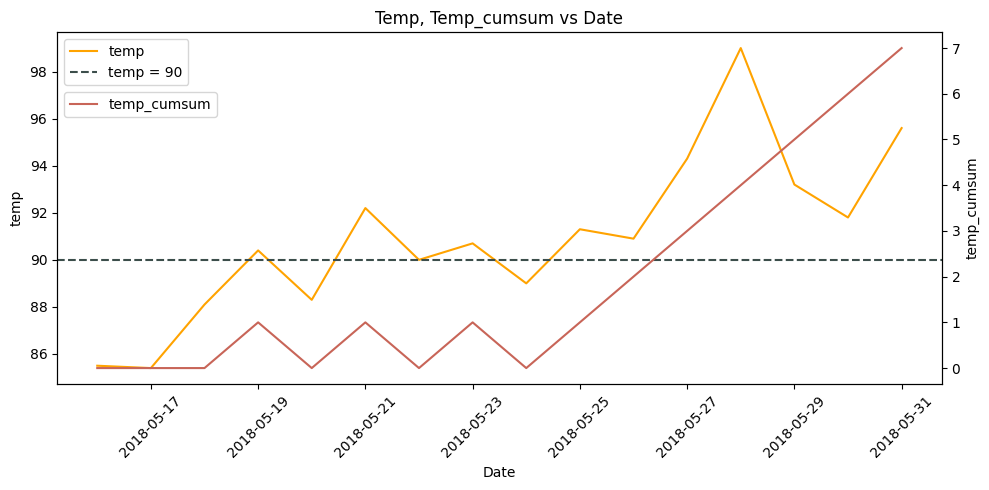

In [ ]:
#Let's Plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = '#ffa300'
ax1.set_xlabel('Date')
plt.xticks(rotation=45)
ax1.set_ylabel('temp', color="black")
ax1.plot(gsod_subset_may["temp"], color=color, label = 'temp')
ax1.tick_params(axis='y', labelcolor="black")
plt.axhline(y = 90, color = '#3c4e4b', linestyle = '--', label = 'temp = 90')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#c86558'
ax2.set_ylabel('temp_cumsum', color="black")  # we already handled the x-label with ax1
ax2.plot(gsod_subset_may["temp_cumsum"], color=color, label = 'temp_cumsum')
ax2.tick_params(axis='y', labelcolor="black")

ax1.legend(loc="upper left", bbox_to_anchor=(0, 1))
ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.85))

plt.title('Temp, Temp_cumsum vs Date')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Let's subset for 2018
gsod_subset_2018 = gsod_subset1_pd.loc['2018-01-01':'2018-12-31']

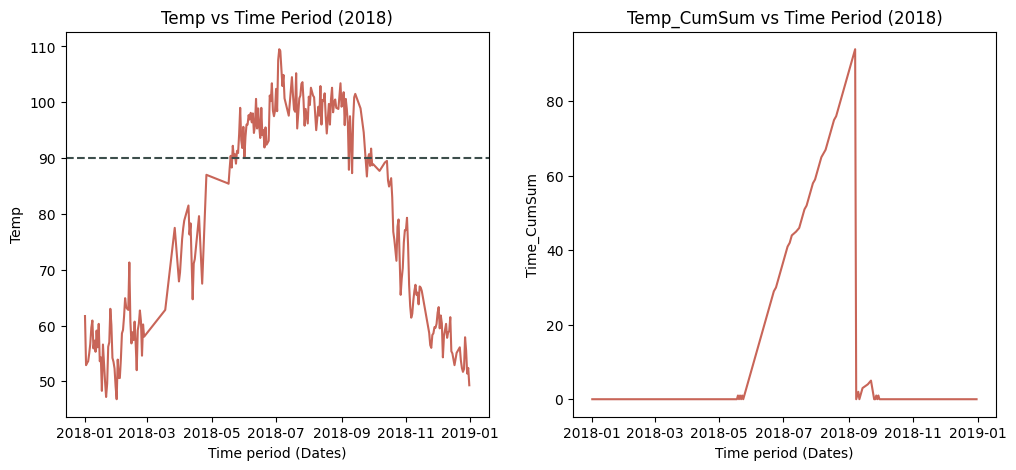

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
y1 = gsod_subset_2018["temp"]
y2 = gsod_subset_2018["temp_cumsum"]
ax1.set_xlabel('Time period (Dates)')
ax2.set_xlabel('Time period (Dates)')

ax1.set_ylabel('Temp')
ax2.set_ylabel('Time_CumSum')

ax1.set_title('Temp vs Time Period (2018)')
ax2.set_title('Temp_CumSum vs Time Period (2018)')


ax1.plot(y1, color = '#c86558')
ax1.axhline(y=90, color='#3c4e4b', linestyle='--', label='temp = 90')
ax2.plot(y2, color = '#c86558')